Universidad del Valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de Ciencias de la Computación <br>
CC3074 Minería de Datos 
## Proyecto

In [138]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from pandas_profiling import ProfileReport
from quickda.clean_data import *
from unidecode import unidecode

# Leer archivo csv
df = pd.read_csv('./DefuncionesDepartamentos.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         4863 non-null   int64 
 1   Departamento de residencia  4863 non-null   object
 2   Causa de muerte             4863 non-null   object
 3   Total                       4863 non-null   object
 4   Hombres                     4863 non-null   object
 5   Mujeres                     4863 non-null   object
dtypes: int64(1), object(5)
memory usage: 228.1+ KB


In [139]:
# Eliminar las tildes de las vocales en la columna "Causa de muerte"
df['Causa de muerte'] = df['Causa de muerte'].apply(lambda x: unidecode(x))

# Eliminar todas las comas de la columna "Causa de muerte", "Total", "Hombres" y "Mujeres"
df['Causa de muerte'] = df['Causa de muerte'].str.replace(',', '')
df['Total'] = df['Total'].str.replace(',', '')
df['Hombres'] = df['Hombres'].str.replace(',', '')
df['Mujeres'] = df['Mujeres'].str.replace(',', '')

# Eliminación de caractéres faltantes
df['Total'] = df['Total'].str.replace('-', '0')
df['Hombres'] = df['Hombres'].str.replace('-', '0')
df['Mujeres'] = df['Mujeres'].str.replace('-', '0')

# Cambio a números enteros de variables numéricas
df["Total"] = df["Total"].astype('int64')
df["Hombres"] = df["Hombres"].astype('int64')
df["Mujeres"] = df["Mujeres"].astype('int64')

df = df[df['Causa de muerte'] != 'Otras causas']
df = df[df['Causa de muerte'] != 'Sintomas signos y hallazgos anormales clinicos y de laboratorio no clasificados en otra parte']

In [140]:
df.head()

,Año,Departamento de residencia,Causa de muerte,Total,Hombres,Mujeres
0,2009,Guatemala,Agresion con disparo de otras armas de fuego y...,1936,1728,208
1,2009,Guatemala,Diabetes mellitus no especificada,934,414,520
2,2009,Guatemala,Infarto agudo del miocardio,870,446,424
3,2009,Guatemala,Exposicion a factores no especificados,844,703,141
4,2009,Guatemala,Neumonia organismo no especificado,756,392,364


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4291 entries, 0 to 4860
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         4291 non-null   int64 
 1   Departamento de residencia  4291 non-null   object
 2   Causa de muerte             4291 non-null   object
 3   Total                       4291 non-null   int64 
 4   Hombres                     4291 non-null   int64 
 5   Mujeres                     4291 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 234.7+ KB


In [142]:
df.describe()

,Año,Total,Hombres,Mujeres
count,4291.000000,4291.000000,4291.000000,4291.000000
mean,2014.998835,122.693312,71.529014,51.327896
std,3.742436,198.750839,121.881963,85.363844
min,2009.000000,11.000000,0.000000,0.000000
25%,2012.000000,40.000000,22.000000,14.000000
50%,2015.000000,70.000000,40.000000,26.000000
75%,2018.000000,122.000000,74.000000,54.000000
max,2021.000000,5226.000000,3283.000000,1943.000000


<AxesSubplot: >

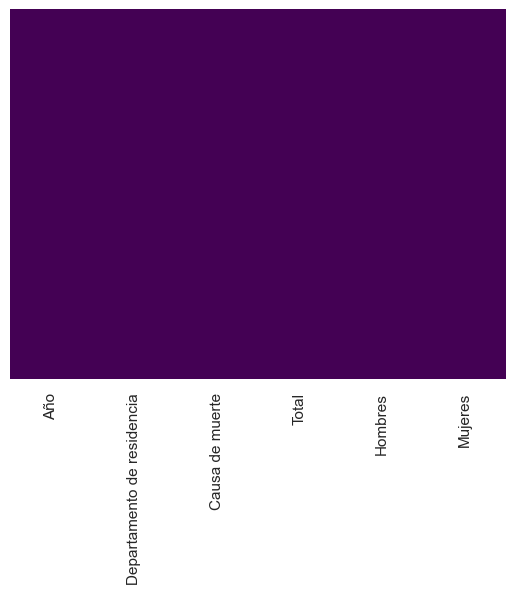

In [143]:
# Revisión de datos nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [144]:
profiler = ProfileReport(df)
profiler

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

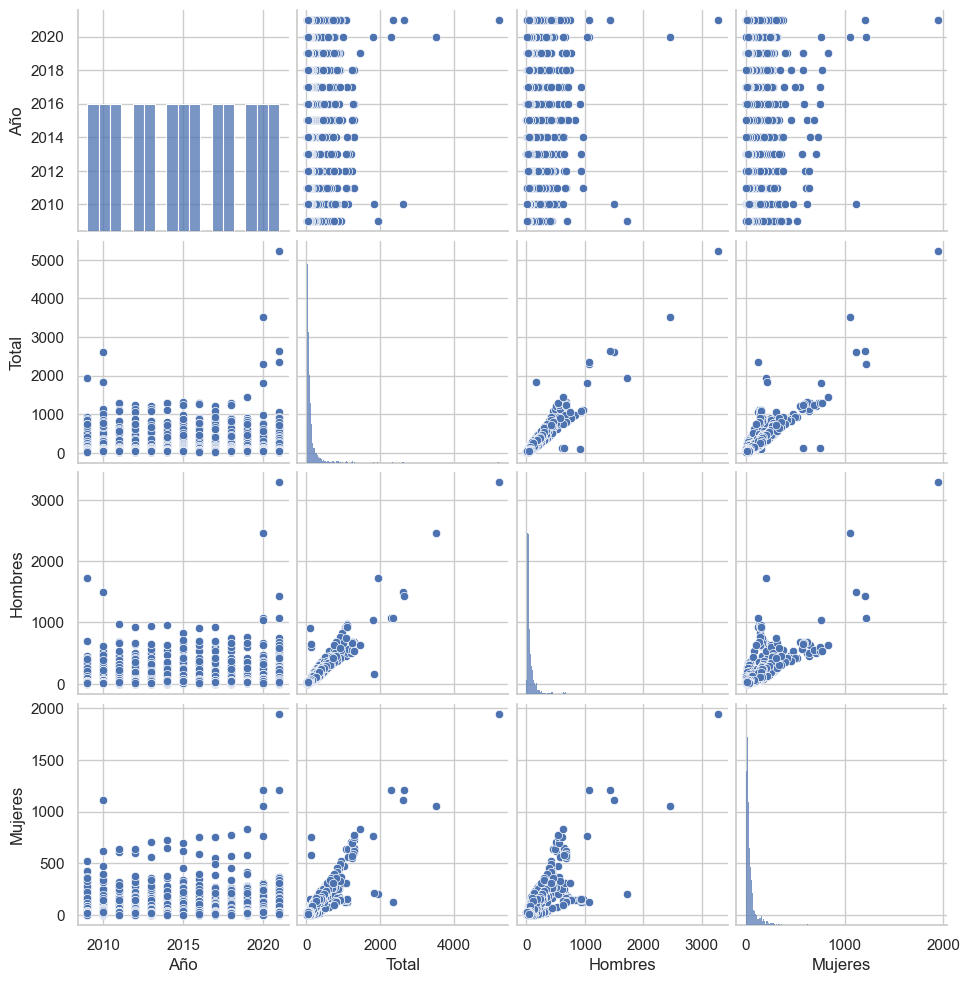

In [145]:
sns.pairplot(df)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16104\48176684.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

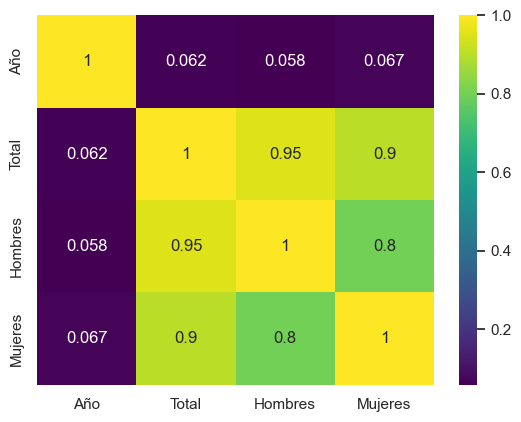

In [146]:
# Gráfico de correlación entre los datos
sns.heatmap(df.corr(),cmap = 'viridis', annot = True)

[Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '135'),
 Text(0, 0, '196'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '135'),
 Text(0, 0, '135'),
 Text(0, 0, '195'),
 Text(0, 0, '135'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '180'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '180'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '195'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '15'),
 Text(0, 0, '15')]

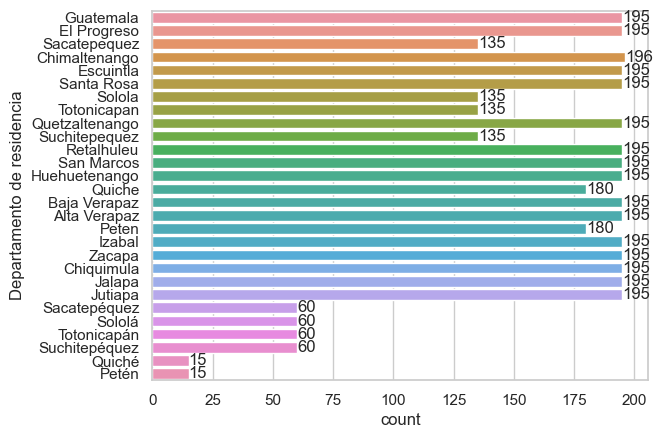

In [147]:
ay = sns.countplot(y = 'Departamento de residencia', data = df);
ay.bar_label(ay.containers[0])

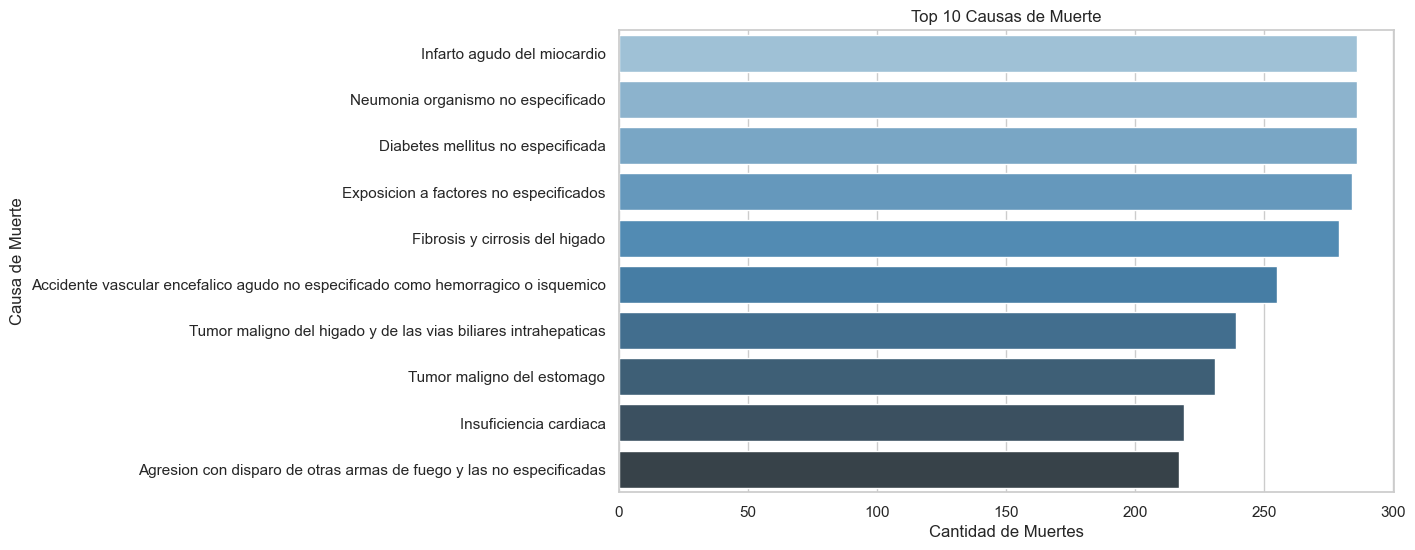

In [148]:
# Contar la frecuencia de cada valor en la columna 'Causa de muerte' y seleccionar los 10 más comunes
top10_causas = df['Causa de muerte'].value_counts().head(10)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(y='Causa de muerte', data=df, order=top10_causas.index, palette='Blues_d')
plt.title('Top 10 Causas de Muerte')
plt.xlabel('Cantidad de Muertes')
plt.ylabel('Causa de Muerte')
plt.show()

<AxesSubplot: xlabel='Año', ylabel='Hombres'>

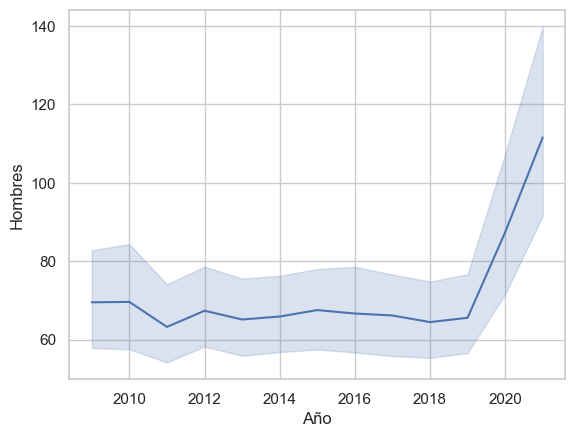

In [149]:
sns.lineplot(data=df, x="Año", y="Hombres")

<AxesSubplot: xlabel='Año', ylabel='Mujeres'>

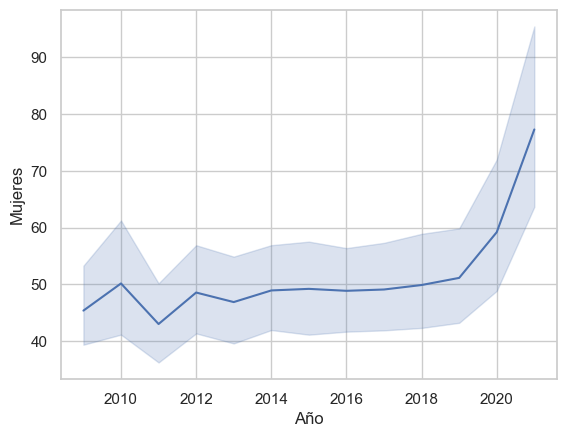

In [150]:
sns.lineplot(data=df, x="Año", y="Mujeres")

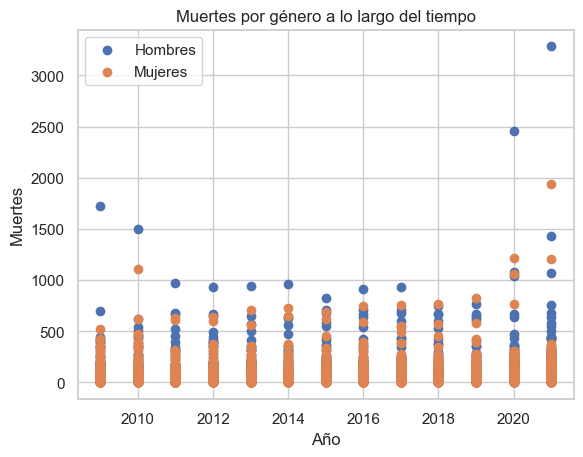

In [151]:
plt.scatter(df['Año'], df['Hombres'], label='Hombres')
plt.scatter(df['Año'], df['Mujeres'], label='Mujeres')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes por género a lo largo del tiempo')
plt.legend()


Text(0.5, 1.0, 'Promedio de muertes de hombres y mujeres por año')

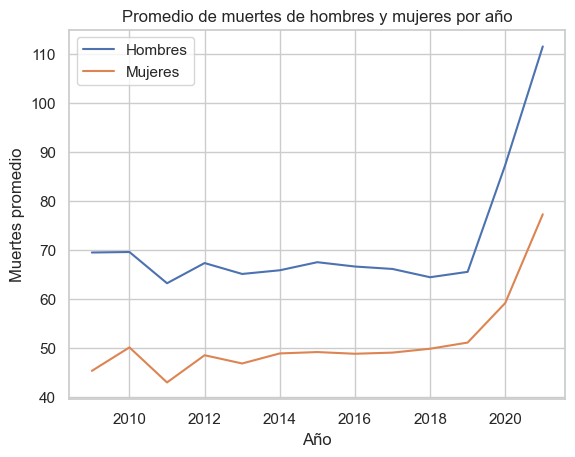

In [152]:
# Agrupar los datos por año y calcular el promedio de muertes de hombres y mujeres
df_avg = df.groupby('Año')[['Hombres', 'Mujeres']].mean()

# Crear un gráfico de línea para mostrar la tendencia a lo largo del tiempo
df_avg.plot(kind='line')
plt.xlabel('Año')
plt.ylabel('Muertes promedio')
plt.title('Promedio de muertes de hombres y mujeres por año')


Text(0.5, 1.0, 'Muertes por género a lo largo del tiempo')

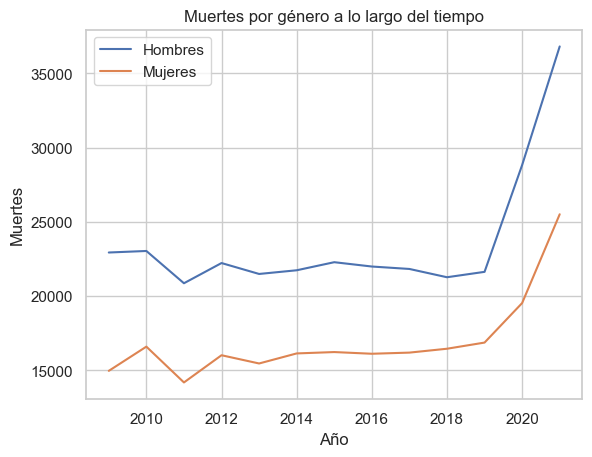

In [153]:
df.groupby('Año')[['Hombres', 'Mujeres']].sum().plot(kind='line')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes por género a lo largo del tiempo')


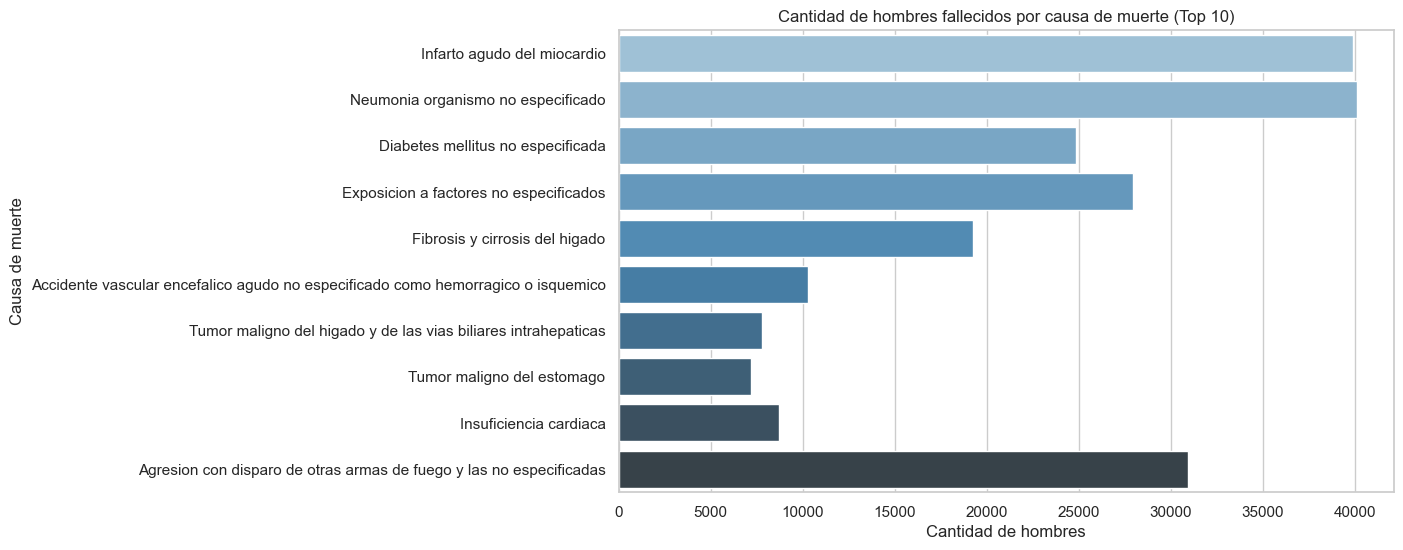

In [154]:
top10_causas = df['Causa de muerte'].value_counts().head(10)
hombres_por_causa = df.groupby('Causa de muerte')['Hombres'].sum().loc[top10_causas.index]
plt.figure(figsize=(10, 6))
sns.barplot(x=hombres_por_causa, y=hombres_por_causa.index, palette='Blues_d')
plt.title('Cantidad de hombres fallecidos por causa de muerte (Top 10)')
plt.xlabel('Cantidad de hombres')
plt.ylabel('Causa de muerte')
plt.show()

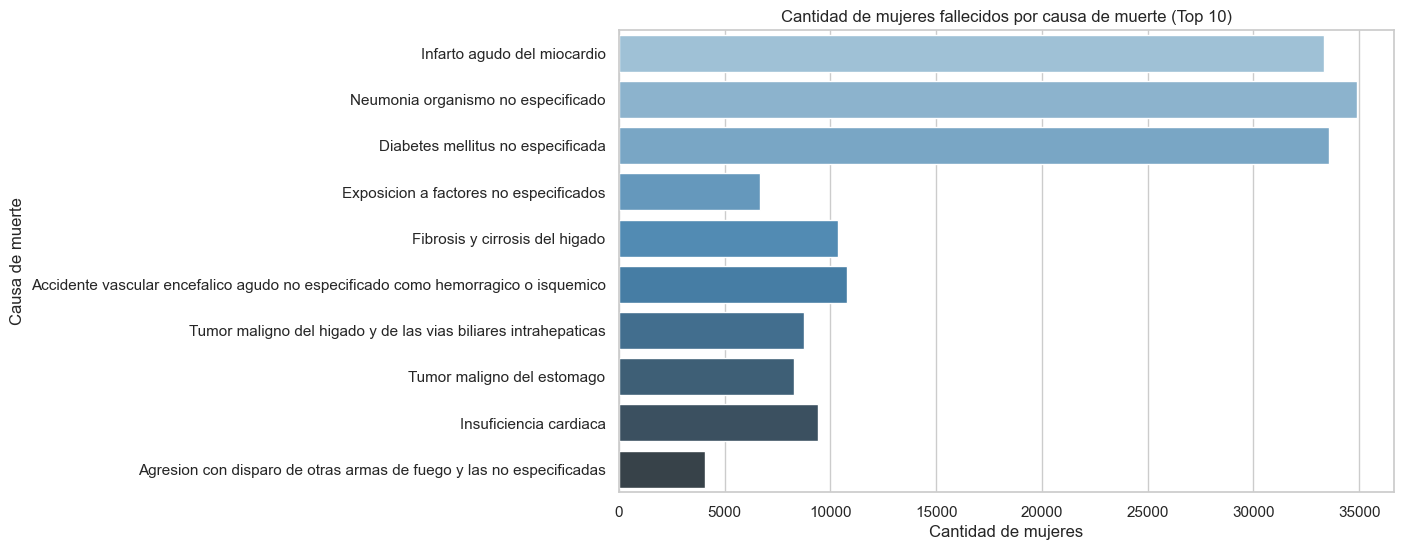

In [155]:
top10_causas = df['Causa de muerte'].value_counts().head(10)
hombres_por_causa = df.groupby('Causa de muerte')['Mujeres'].sum().loc[top10_causas.index]
plt.figure(figsize=(10, 6))
sns.barplot(x=hombres_por_causa, y=hombres_por_causa.index, palette='Blues_d')
plt.title('Cantidad de mujeres fallecidos por causa de muerte (Top 10)')
plt.xlabel('Cantidad de mujeres')
plt.ylabel('Causa de muerte')
plt.show()

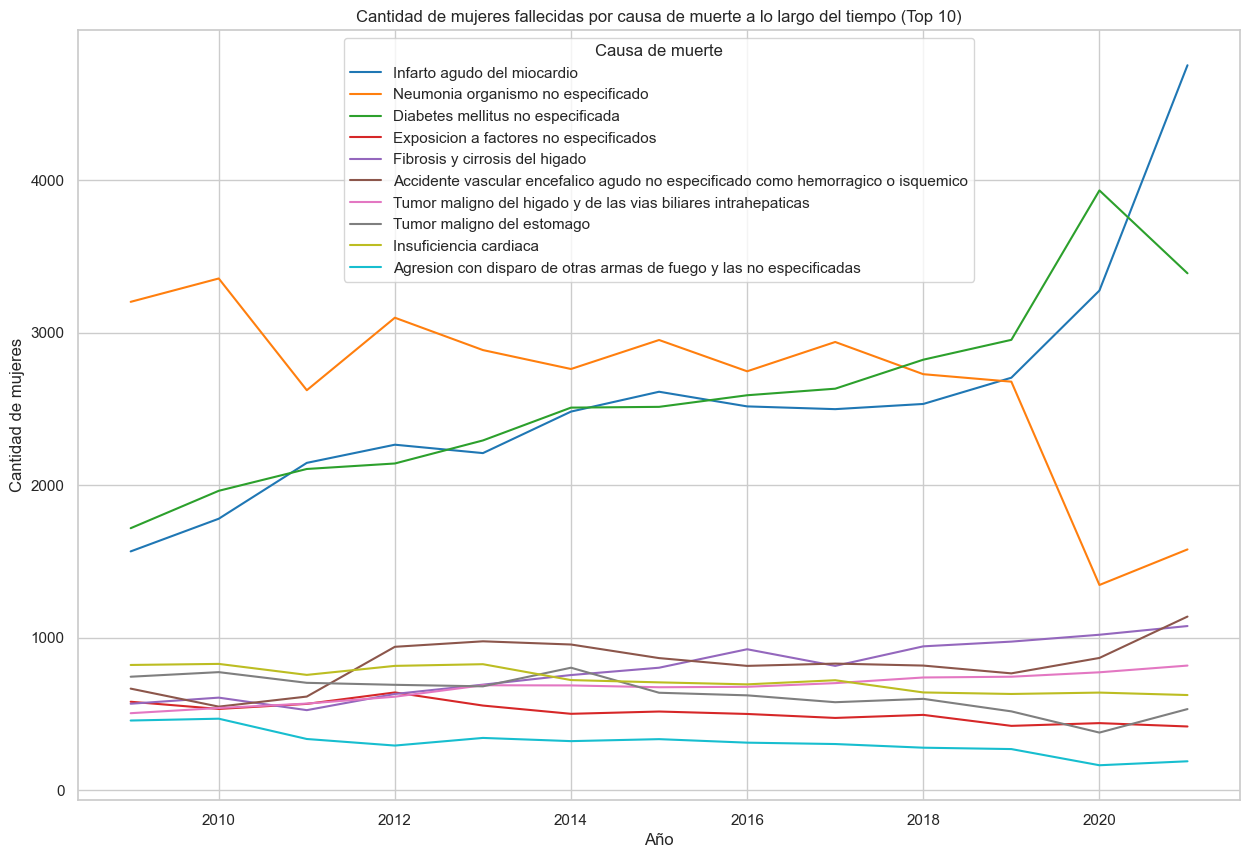

In [156]:
top10_causas = df['Causa de muerte'].value_counts().head(10)
Mujeres_por_causa_y_anio = df.groupby(['Causa de muerte', 'Año'])['Mujeres'].sum().loc[top10_causas.index]
Mujeres_por_causa_y_anio = Mujeres_por_causa_y_anio.reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(x='Año', y='Mujeres', hue='Causa de muerte', data=Mujeres_por_causa_y_anio, palette='tab10')
plt.title('Cantidad de mujeres fallecidas por causa de muerte a lo largo del tiempo (Top 10)')
plt.xlabel('Año')
plt.ylabel('Cantidad de mujeres')
plt.show()

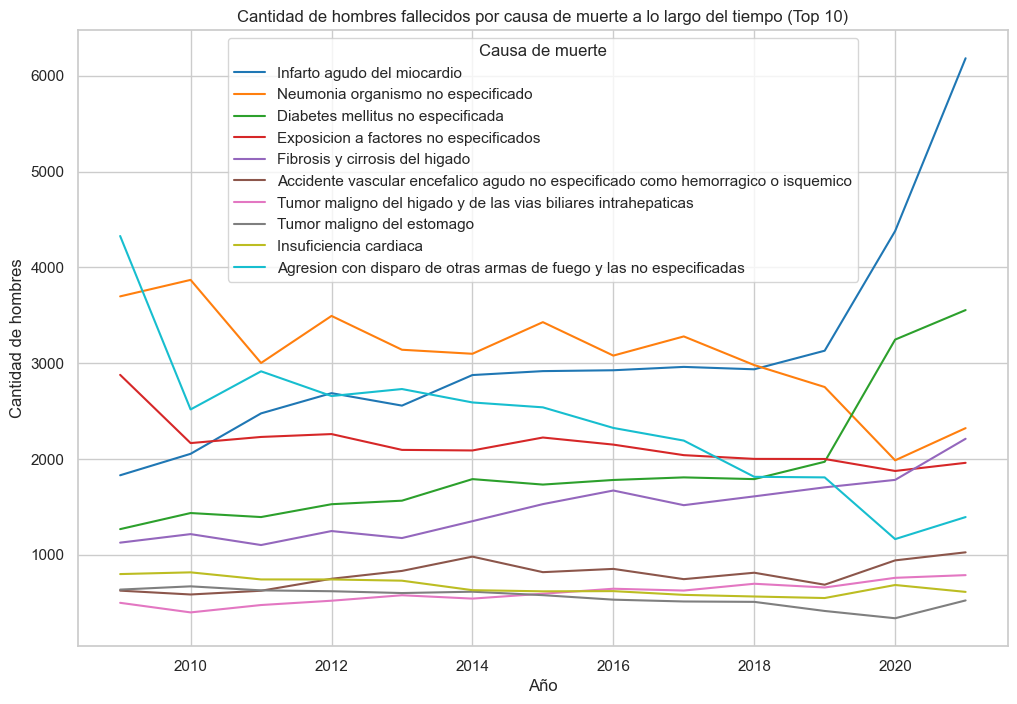

In [157]:
top10_causas = df['Causa de muerte'].value_counts().head(10)
hombres_por_causa_y_anio = df.groupby(['Causa de muerte', 'Año'])['Hombres'].sum().loc[top10_causas.index]
hombres_por_causa_y_anio = hombres_por_causa_y_anio.reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Año', y='Hombres', hue='Causa de muerte', data=hombres_por_causa_y_anio, palette='tab10')
plt.title('Cantidad de hombres fallecidos por causa de muerte a lo largo del tiempo (Top 10)')
plt.xlabel('Año')
plt.ylabel('Cantidad de hombres')
plt.show()

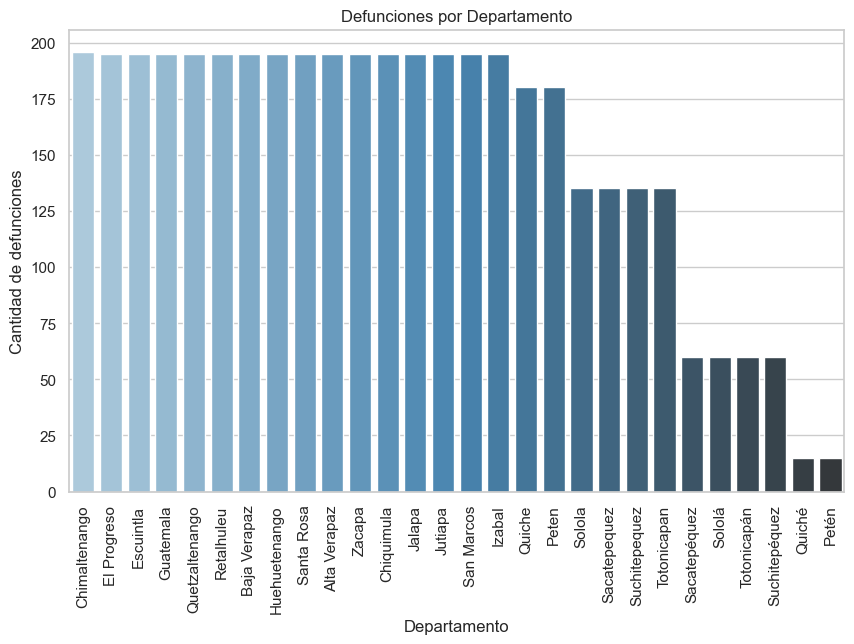

In [158]:
# Contar la frecuencia de los departamentos y ordenarlos de manera descendente
freq_depto = df['Departamento de residencia'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=freq_depto.index, y=freq_depto.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Departamento')
plt.ylabel('Cantidad de defunciones')
plt.title('Defunciones por Departamento')
plt.show()